<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [9]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv", index_col=0)

In [18]:
#Checking out the data imported
print(netflix_df)

#We can see from the below there are too many rows to this manually! I will data exploration techniques to complete the project. 

            type  ...             genre
show_id           ...                  
s2         Movie  ...            Dramas
s3         Movie  ...     Horror Movies
s4         Movie  ...            Action
s5         Movie  ...            Dramas
s6       TV Show  ...  International TV
...          ...  ...               ...
s7779      Movie  ...          Comedies
s7781      Movie  ...            Dramas
s7782      Movie  ...          Children
s7783      Movie  ...            Dramas
s7784      Movie  ...            Dramas

[4812 rows x 10 columns]


# Finding movies released in the 90s
Movies released from 1990 to 1999

In [11]:
#Finding our 90s movies data
# 1. Selecting Columns

#Isolating the release_year column in a series
release_year =netflix_df["release_year"]

#Make sure column is a series to perform operations on it
type(release_year) 

#Good! From the below it is a series

pandas.core.series.Series

In [12]:
# 2. Compare 
#Finding movies in released in the 90s
nineties_releases =np.logical_and(release_year >= 1990, release_year<2000) #filtering for movies between 1990 and 1999

In [13]:
# 3. Subset df
#Filtering netflix_df for movies with 90s 
filtered_netflix_df=netflix_df[nineties_releases] 

#Sanity check
print(filtered_netflix_df["release_year"])

#From the below we see only 90s movies present

show_id
s8       1997
s167     1993
s211     1998
s239     1996
s274     1993
         ... 
s7536    1999
s7571    1993
s7624    1999
s7682    1994
s7695    1994
Name: release_year, Length: 184, dtype: int64


Since we have filtered for dataframe for 90s movie we can plot a histogram to find out the duration that occured the most.  

## Plotting Histogram

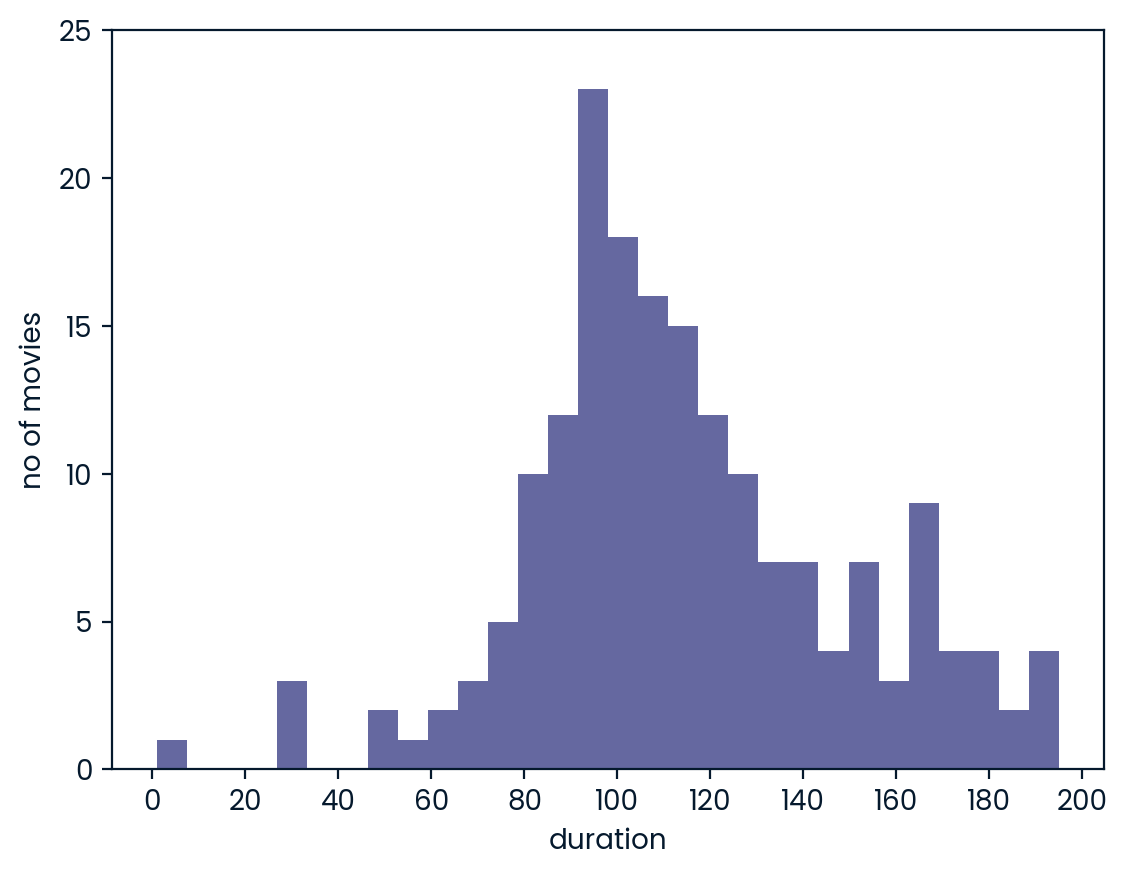

In [14]:
# Finding Duration
# We can plot a histogram of the movie durations. filtered_netflix_df series contains only 90s movie rows. 
plt.hist((filtered_netflix_df["duration"]), bins=30)
plt.xlabel('duration')
plt.ylabel('no of movies')
plt.yticks([0, 5, 10, 15, 20, 25])

# Adjust automatic tick selection (optional)
plt.locator_params(axis='x', nbins=15)
plt.show()

# Most frequent movie duration is in the bin between 90 and 100
duration = 90 


# Counting the number of short action movies
Short Action movies are movies which duration are than 90. 
## Method 1: Through comprator method

In [15]:
#Dataframe filtered_netflix_df is already filtered for 90s movie
filtered_netflix_df

#Creating Boolean of movies which short (<90) and action movies
short_action=np.logical_and(filtered_netflix_df['genre'] == 'Action', filtered_netflix_df['duration']<90)

#Subsetting dataframe to get that figure
filtered_netflix_df[short_action]

,type,title,director,cast,country,date_added,release_year,duration,description,genre
show_id,,,,,,,,,,
s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


We can see from counting the number of rows above that the number of short action movies should be 7. 

We will use another method. Where we create a counter with a for loop to confirm if this is correct. 

## Method 2: Building Counter For Loop 

In [16]:
# Filtering for action movies in the dataframe fir movies released in the 90s
filtered_netflix_df["genre"] == "Action"
Action_nineties_movies = filtered_netflix_df[filtered_netflix_df["genre"] == "Action"]

# Verifying the number of short action movies
short_movie_count = 0
for label, row in Action_nineties_movies.iterrows():
    if row["duration"] < 90:
        short_movie_count = short_movie_count + 1
        short_movie_count
    else:
        row["duration"] >=90
        short_movie_count = short_movie_count + 0
        short_movie_count
#print shortmoviecount 
print(short_movie_count)

7


It's confirmed that the number of short action movies released from 1990 to 1999 was 7. 

Created by Sanjo Babatunde. 
Completed on the 29th January 2025. 